# __Visualisations from cleaned data:__<br>

 - Necessary further price cleaning<br>
 - Divide dataframe into numerical, boolean and categorical variables<br>
 - Price correlations of categorical variables<br>
     - Data overview<br>
     - Data preparation<br>
     - Visual creation<br>
 - Price correlations of numerical variables<br>
     - Data overview<br>
     - Visual creation<br>
 - Price correlations of boolean variables<br>
     - Data overview<br>
     - Data preparation<br>
     - Visual creation<br>

In [535]:
import pandas as pd
import matplotlib
import seaborn as sns
from pandas.api.types import infer_dtype
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

# set plos to match the jupyter theme
from jupyterthemes import jtplot
jtplot.style()

# reset style for printing
#jtplot.reset()

In [536]:
df = pd.read_csv('../csv_files/cleaned_properties.csv', low_memory = False, index_col = 0)

print(df.info(),'\n')

print('Inferred datatypes:\n',df.apply(infer_dtype),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68788 entries, 0 to 70123
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locality           44275 non-null  float64
 1   house_is           57568 non-null  object 
 2   property_subtype   62872 non-null  object 
 3   price              68516 non-null  float64
 4   sale               10551 non-null  object 
 5   rooms_number       68528 non-null  float64
 6   area               64288 non-null  float64
 7   kitchen_has        58837 non-null  float64
 8   furnished          57067 non-null  float64
 9   open_fire          63266 non-null  float64
 10  terrace            49486 non-null  float64
 11  terrace_area       39066 non-null  float64
 12  garden             60972 non-null  float64
 13  garden_area        40211 non-null  float64
 14  land_surface       30696 non-null  float64
 15  land_plot_surface  35673 non-null  object 
 16  facades_number     572

## __Necessary further price cleaning__

In [520]:
df.price.sort_values(ascending = False)

19375    1.350000e+10
19317    1.300000e+10
19316    1.300000e+10
19547    1.280000e+10
19560    1.180000e+10
             ...     
18630             NaN
18631             NaN
18632             NaN
18633             NaN
18634             NaN
Name: price, Length: 68788, dtype: float64

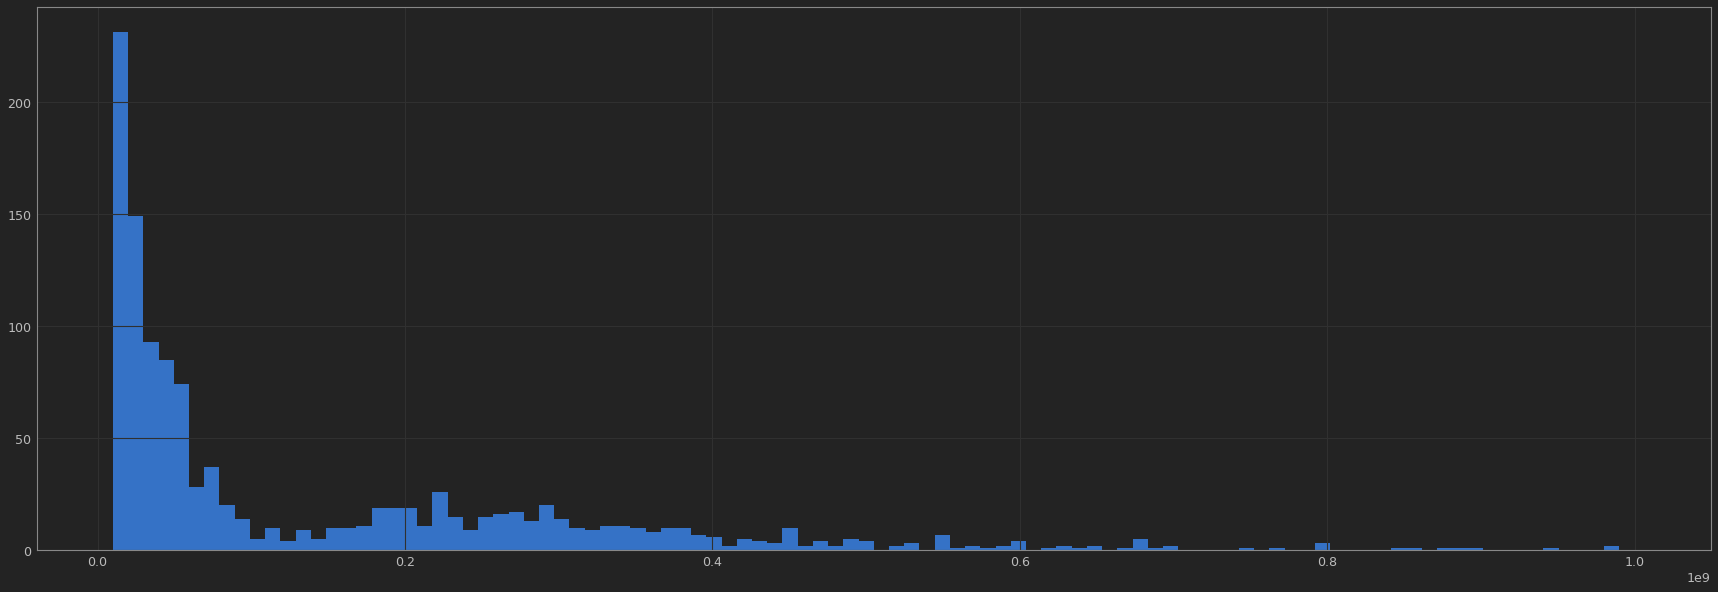

In [521]:
# Unnaturally high prices pick up from ~€140 million
# indicating the mistake of multiplying some prices with 1.000
plt.figure(figsize=(30,10))
plt.hist(df.price, range = (10000000,1000000000), bins = 100)
plt.show()

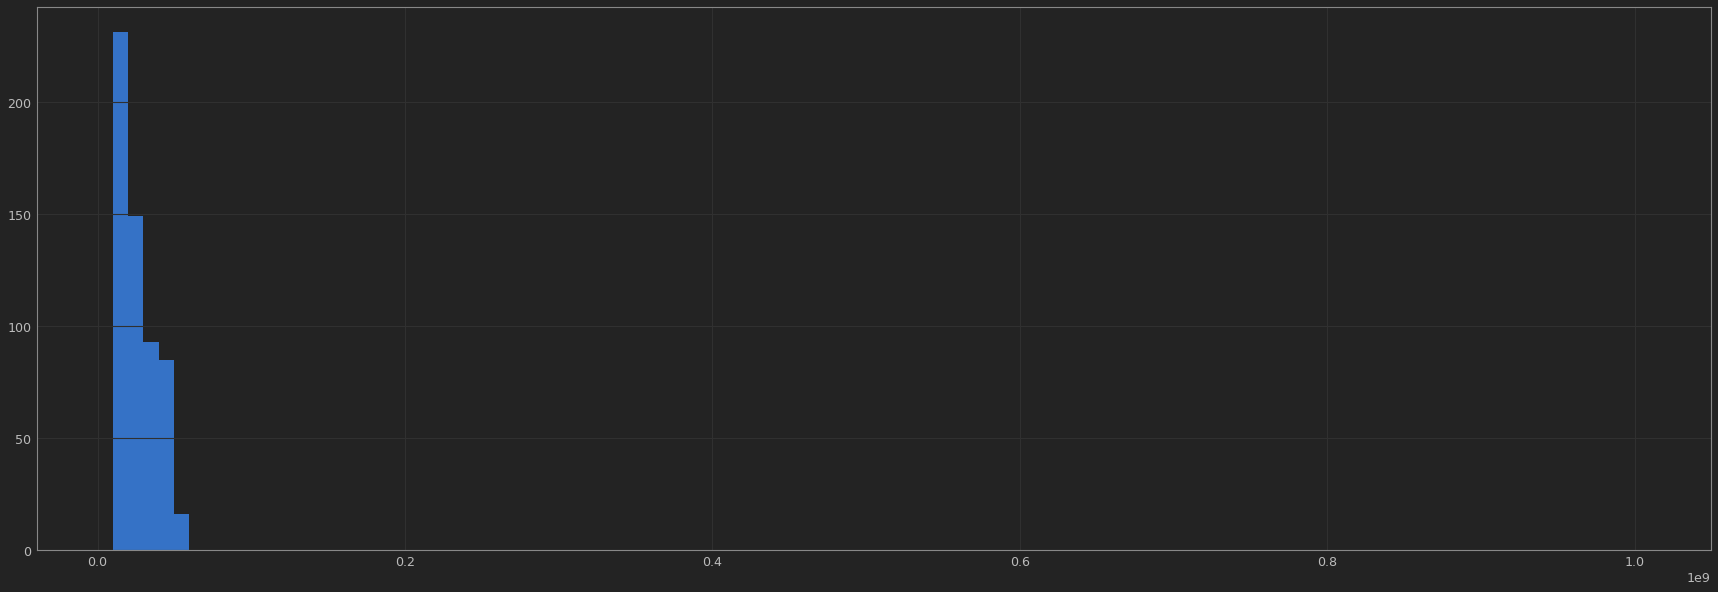

In [522]:
# let's try to delete much of those errors
df.loc[df.price > 50000000, 'price'] = np.nan

plt.figure(figsize=(30,10))
plt.hist(df.price, range = (10000000,1000000000), bins = 100)
plt.show()

In [523]:
df.columns

Index(['locality', 'house_is', 'property_subtype', 'price', 'sale',
       'rooms_number', 'area', 'kitchen_has', 'furnished', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_surface',
       'land_plot_surface', 'facades_number', 'swimming_pool_has',
       'building_state', 'region'],
      dtype='object')

## __Divide dataframe into numerical, boolean and categorical variables__

In [537]:
df_numerical = df[['price', 'area', 'terrace_area', 'garden_area', 'land_surface',
                   'land_plot_surface']].copy()
df_boolean = df[['price', 'region', 'open_fire', 'terrace', 'house_is',
         'swimming_pool_has', 'kitchen_has', 'furnished', 'garden']].copy()
df_categorical = df[['price', 'region', 'house_is', 'property_subtype',
                     'facades_number', 'building_state', 'rooms_number']].copy()

# purge original dataframe
df = ''

## __Price correlations of categorical variables__

### Data overview

In [525]:
print(df_categorical.info(),'\n')

print('Inferred datatypes:\n',df_categorical.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_categorical:
    col_uniques = pd.DataFrame({f'{col}_value': df_categorical[f'{col}'].value_counts().index,
                                f'{col}_count': df_categorical[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68788 entries, 0 to 70123
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             67856 non-null  float64
 1   region            68788 non-null  object 
 2   house_is          57568 non-null  object 
 3   property_subtype  62872 non-null  object 
 4   facades_number    57224 non-null  float64
 5   building_state    36433 non-null  object 
 6   rooms_number      68528 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.2+ MB
None 

Inferred datatypes:
 price               floating
region                string
house_is             boolean
property_subtype      string
facades_number      floating
building_state        string
rooms_number        floating
dtype: object 

Value counts:


,price_value,price_count,region_value,region_count,house_is_value,house_is_count,property_subtype_value,property_subtype_count,facades_number_value,facades_number_count,building_state_value,building_state_count,rooms_number_value,rooms_number_count
0,295000.0,849,Flanders,49449.0,True,30866.0,HOUSE,25115.0,0.0,24277.0,AS_NEW,14569.0,3.0,21500.0
1,249000.0,813,Wallonia,12685.0,False,26702.0,APARTMENT,20086.0,2.0,14978.0,GOOD,12201.0,2.0,18795.0
2,275000.0,812,Brussels,6654.0,NaN,NaN,VILLA,4056.0,4.0,9343.0,TO_BE_DONE_UP,3227.0,4.0,10719.0
3,199000.0,811,NaN,NaN,NaN,NaN,APARTMENT_BLOCK,1922.0,3.0,8235.0,TO_RENOVATE,2773.0,1.0,5562.0
4,299000.0,809,NaN,NaN,NaN,NaN,MIXED_USE_BUILDING,1722.0,1.0,388.0,JUST_RENOVATED,2605.0,5.0,4854.0
5,225000.0,775,NaN,NaN,NaN,NaN,DUPLEX,1228.0,10.0,2.0,old,483.0,6.0,2562.0
6,195000.0,663,NaN,NaN,NaN,NaN,unknown,1123.0,6.0,1.0,New,395.0,0.0,1247.0
7,395000.0,656,NaN,NaN,NaN,NaN,PENTHOUSE,1110.0,NaN,NaN,TO_RESTORE,180.0,7.0,1231.0
8,325000.0,653,NaN,NaN,NaN,NaN,MANSION,711.0,NaN,NaN,NaN,NaN,8.0,708.0
9,175000.0,602,NaN,NaN,NaN,NaN,EXCEPTIONAL_PROPERTY,678.0,NaN,NaN,NaN,NaN,9.0,493.0


### Data preparation

In [526]:
# Change subtype to all smallcaps
df_categorical['property_subtype'] = df_categorical['property_subtype'].str.lower()

# Change - to underscore
df_categorical['property_subtype'].replace('-', '_', inplace = True)

In [527]:
df_categorical['building_state'].replace('TO_BE_DONE_UP',
                                         'TO_RENOVATE', inplace = True)
df_categorical['building_state'].replace('TO_RESTORE',
                                         'TO_RENOVATE', inplace = True)

### Visual 1

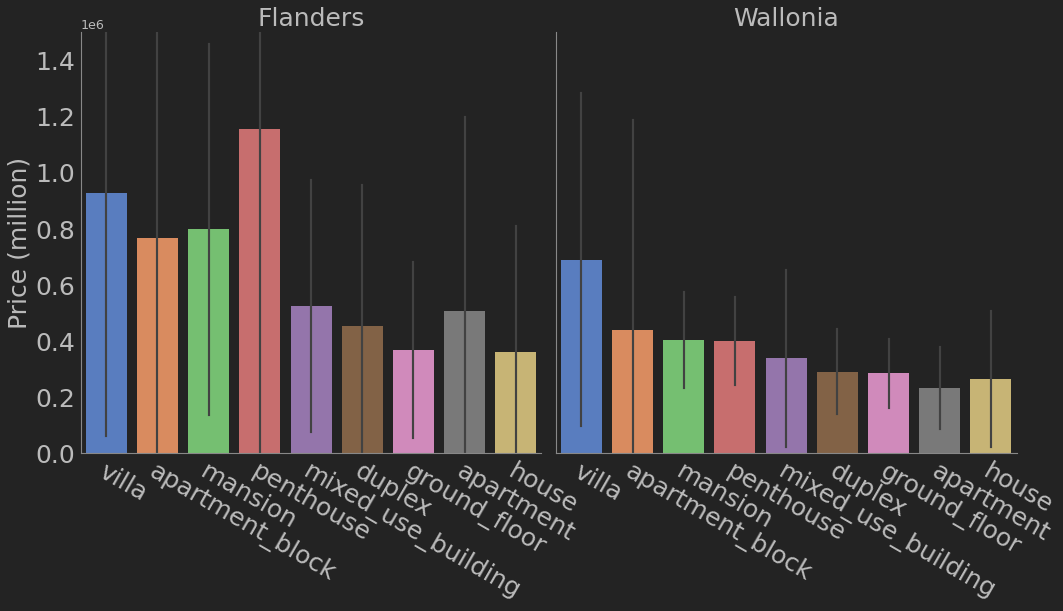

In [528]:
g = sns.FacetGrid(df_categorical, col="region",
                  col_order = ['Flanders', 'Wallonia'], height=7)

g.map(sns.barplot, 'property_subtype', 'price', alpha=1,
     order = ['villa', 'apartment_block', 'mansion', 'penthouse',
                     'mixed_use_building', 'duplex', 'ground_floor',
                     'apartment', 'house'], palette="muted", ci = 'sd')

g.set(ylim=(0, 1500000))
g.axes[0,0].set_ylabel('Price (million)', fontsize = 25)
g.axes[0,0].set_xlabel('')
g.axes[0,1].set_xlabel('')
g.axes[0,0].set_title('Flanders', fontsize=25)
g.axes[0,1].set_title('Wallonia', fontsize=25)


g.axes[0,0].tick_params(axis='x', which='major', labelsize = 25)
g.axes[0,1].tick_params(axis='x', which='major', labelsize = 25)
g.axes[0,0].tick_params(axis='y', which='major', labelsize = 25)
g.axes[0,0].grid(False)
g.axes[0,1].grid(False)
plt.setp(g.axes[0,0].xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")
plt.setp(g.axes[0,1].xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")

plt.savefig("../pictures/property_subtype_cor_by_region.png", transparent=True)

plt.show()

### Visual 2

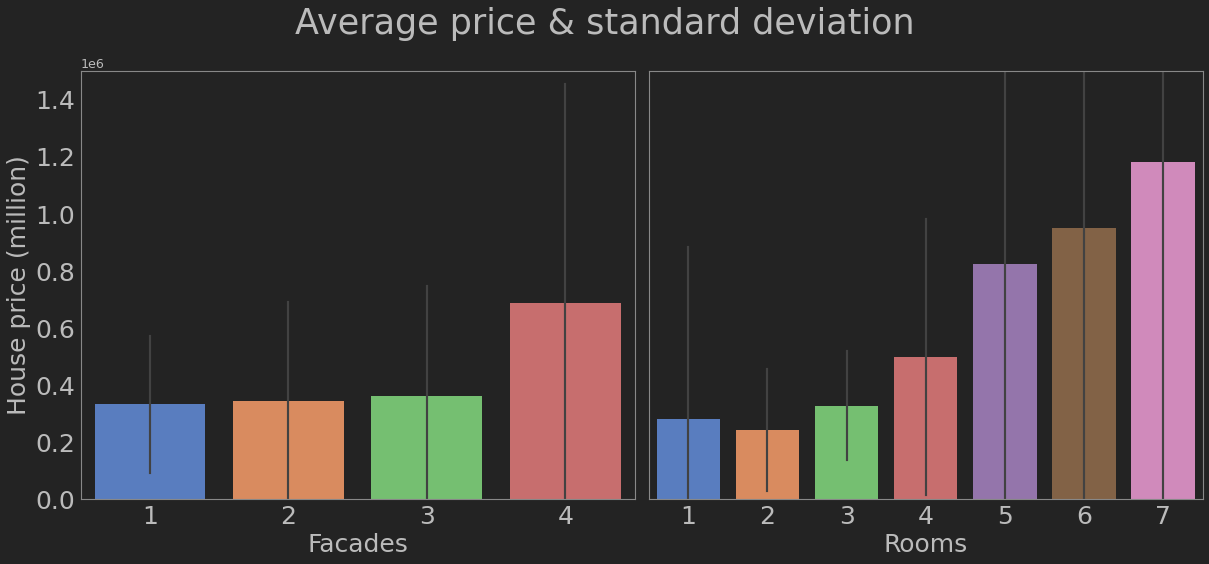

In [529]:
house_mask = df_categorical.house_is == 1
house_flanders_mask = house_mask & (df_categorical.region == 'Flanders')

fig1, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(17,8))

sns.barplot(x='facades_number', y='price',
               data=df_categorical[house_flanders_mask], palette="muted",
               ax=ax1, ci = 'sd', order = [1, 2, 3, 4])
sns.barplot(x='rooms_number', y='price',
               data=df_categorical[house_flanders_mask], palette="muted",
               ax=ax2, ci = 'sd', order = [1, 2, 3, 4, 5, 6, 7])

for ax in (ax1, ax2):
    ax.grid(False)
    ax.set_ylabel('')
    ax.tick_params(axis='x', which='major', labelsize = 'xx-large')
    ax.tick_params(axis='y', which='major', labelsize = 'xx-large')

ax1.axis([None, None, 0, 1500000])
ax1.set_ylabel('House price (million)', fontsize = '25')

ax2.set_ylabel('', fontsize = 'xx-large')

ax1.set_xlabel('Facades', fontsize = '25')
ax2.set_xlabel('Rooms', fontsize = '25')
ax1.tick_params(axis='both', which='major', labelsize = 25)
ax2.tick_params(axis='both', which='major', labelsize = 25)

fig1.suptitle('Average price & standard deviation', fontsize=35)

plt.tight_layout()

plt.savefig("../pictures/facades_rooms_cor_house_flanders.png", transparent=True)

plt.show()

## __Price correlations of numerical variables__

### Data overview

In [538]:
print(df_numerical.info(),'\n')

print('Inferred datatypes:\n',df_numerical.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_numerical:
    col_uniques = pd.DataFrame({f'{col}_value': df_numerical[f'{col}'].value_counts().index,
                                f'{col}_count': df_numerical[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68788 entries, 0 to 70123
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              68516 non-null  float64
 1   area               64288 non-null  float64
 2   terrace_area       39066 non-null  float64
 3   garden_area        40211 non-null  float64
 4   land_surface       30696 non-null  float64
 5   land_plot_surface  35673 non-null  object 
dtypes: float64(5), object(1)
memory usage: 3.7+ MB
None 

Inferred datatypes:
 price                floating
area                 floating
terrace_area         floating
garden_area          floating
land_surface         floating
land_plot_surface      string
dtype: object 

Value counts:


,price_value,price_count,area_value,area_count,terrace_area_value,terrace_area_count,garden_area_value,garden_area_count,land_surface_value,land_surface_count,land_plot_surface_value,land_plot_surface_count
0,295000.0,849.0,0.0,3765.0,0.0,23200.0,0.0,31670.0,0.0,14399.0,0,1092
1,249000.0,813.0,100.0,1144.0,20.0,944.0,100.0,295.0,100.0,193.0,0.0,838
2,275000.0,812.0,150.0,1142.0,10.0,870.0,50.0,208.0,150.0,175.0,True,473
3,199000.0,811.0,120.0,1127.0,15.0,801.0,200.0,207.0,200.0,155.0,100,305
4,299000.0,809.0,90.0,1060.0,8.0,707.0,300.0,193.0,300.0,152.0,90,278
5,225000.0,775.0,160.0,966.0,6.0,665.0,400.0,162.0,120.0,136.0,80,258
6,195000.0,663.0,80.0,922.0,30.0,648.0,500.0,159.0,400.0,129.0,70,257
7,395000.0,656.0,140.0,906.0,12.0,622.0,150.0,158.0,1000.0,127.0,120,240
8,325000.0,653.0,110.0,887.0,25.0,568.0,60.0,154.0,250.0,126.0,110,222
9,250000.0,602.0,200.0,869.0,9.0,497.0,30.0,150.0,500.0,117.0,85,207


### Data preparation

In [539]:
# doublecheck if there are no columns with mixed data types
# not indicated by infer_dtype

print('Columns with mixed data types:')
mixed_col_list = []
for col in df_numerical.columns:
    weird = df_numerical[col].apply(type).isin(df_numerical.loc[df_numerical[
        [col]].first_valid_index(), [col]].apply(type))
    if len(df_numerical[weird]) > 0:
        mixed_col_list.append(col)
mixed_col_list
        
# apply works row/columnwise on a dataseries
#df_numerical[['land_plot_surface']].apply(lambda x: type(x[0]), axis = 1)
# apply works elementwise on a series
#df_numerical['land_plot_surface'].apply(type)
# applymap works elementwise on a dataframe and returns a dataframe
#df_numerical[['land_plot_surface']].applymap(type)

Columns with mixed data types:


['land_plot_surface']

In [540]:
# print the data type counts for the mixed columns
mixed_type_counts = pd.DataFrame()
for col in mixed_col_list:
    type_counts = df_numerical[col].apply(lambda x: type(x)).value_counts()
    mixed_type_counts = pd.concat([mixed_type_counts, type_counts], axis = 1)
mixed_type_counts
    
# inferred dtype is string but half are actually floats !

,land_plot_surface
<class 'str'>,35673
<class 'float'>,33115


In [541]:
# astype(float) does not work on strings that are not number like
df_numerical['land_plot_surface'].astype(float)

ValueError: could not convert string to float: 'False'

In [542]:
# create a function for masking the strings that can not be
# cast as floats
def non_floats(element):
    if type(element) == str:
        try:
            float(element)
            return False
        except ValueError:
            return True
    else:
        return False
    
text_mask = df_numerical.land_plot_surface.apply(lambda x: non_floats(x))
print('String values and counts which will be reset to NaN:')
print(df_numerical.loc[text_mask, 'land_plot_surface'].value_counts())

# convert the strings to Floats or when they can not to np.nan
df_numerical['land_plot_surface'] = pd.to_numeric(df_numerical['land_plot_surface'],
                                                  errors='coerce')

# in general, replace 0 or 1 m² with np.nan
df_numerical = df_numerical.applymap(lambda x: np.nan if x == 0 or x == 1 else x)

String values and counts which will be reset to NaN:
True     473
False     30
Name: land_plot_surface, dtype: int64


### Visual 3

/home/philippe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


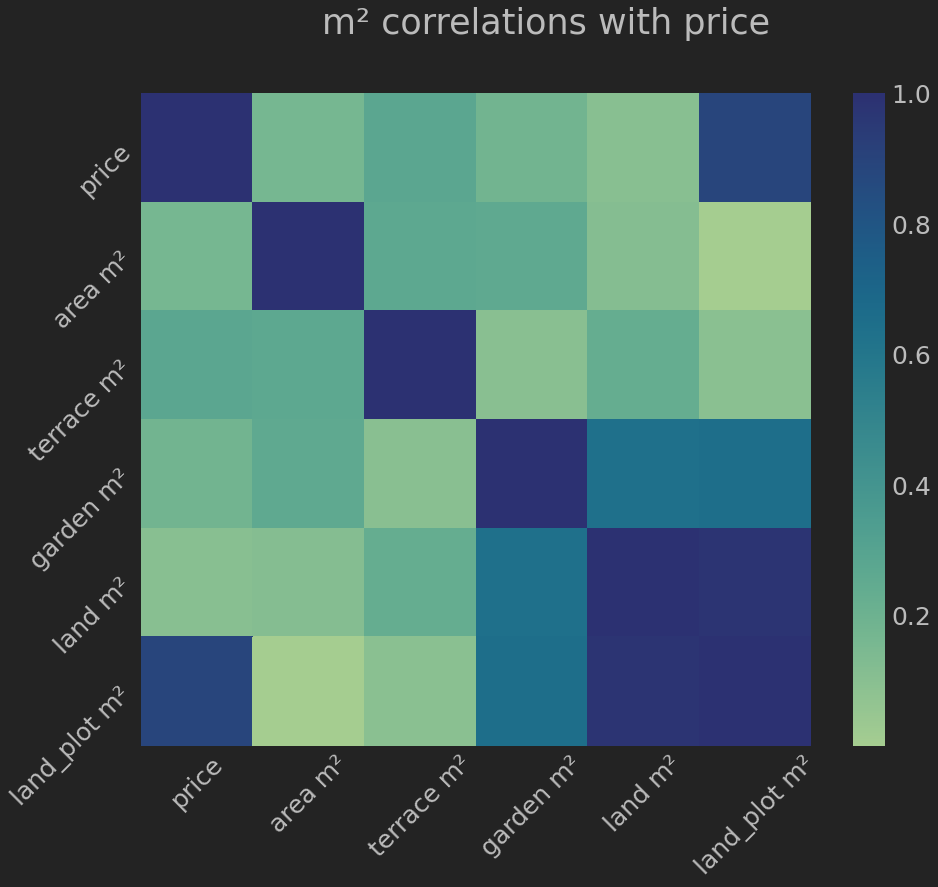

In [543]:
labels = ['price', 'area m²', 'terrace m²', 'garden m²', 'land m²', 'land_plot m²']
corr = df_numerical.corr()
 
# Heatmap
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(corr, xticklabels = labels, yticklabels = labels, cmap = 'crest')
#ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
ax.figure.axes[-2].set_xticklabels(labels, rotation = 45, fontsize = 25)
ax.figure.axes[-2].set_yticklabels(labels, rotation = 45, fontsize = 25)
ax.figure.axes[-1].set_yticklabels(ax.figure.axes[-1].get_yticklabels(), fontsize = 25)

fig.suptitle('m² correlations with price', fontsize=35)

plt.savefig("../pictures/area_cor.png", transparent=True)

## __Price correlations of boolean variables__

### Data overview

In [544]:
print(df_boolean.info(),'\n')

print('Inferred datatypes:\n',df_boolean.apply(infer_dtype),'\n')

uniques = pd.DataFrame()
for col in df_boolean:
    col_uniques = pd.DataFrame({f'{col}_value': df_boolean[f'{col}'].value_counts().index,
                                f'{col}_count': df_boolean[f'{col}'].value_counts().values})
    uniques = pd.concat([uniques, col_uniques], axis = 1)

print('Value counts:')
uniques.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68788 entries, 0 to 70123
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              68516 non-null  float64
 1   region             68788 non-null  object 
 2   open_fire          63266 non-null  float64
 3   terrace            49486 non-null  float64
 4   house_is           57568 non-null  object 
 5   swimming_pool_has  52167 non-null  float64
 6   kitchen_has        58837 non-null  float64
 7   furnished          57067 non-null  float64
 8   garden             60972 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.7+ MB
None 

Inferred datatypes:
 price                floating
region                 string
open_fire            floating
terrace              floating
house_is              boolean
swimming_pool_has    floating
kitchen_has          floating
furnished            floating
garden               floating
dtype: object 

,price_value,price_count,region_value,region_count,open_fire_value,open_fire_count,terrace_value,terrace_count,house_is_value,house_is_count,swimming_pool_has_value,swimming_pool_has_count,kitchen_has_value,kitchen_has_count,furnished_value,furnished_count,garden_value,garden_count
0,295000.0,849,Flanders,49449.0,0.0,60103.0,0.0,26051.0,True,30866.0,0.0,49922.0,1.0,46718.0,0.0,51184.0,0.0,42505.0
1,249000.0,813,Wallonia,12685.0,1.0,3163.0,1.0,23435.0,False,26702.0,1.0,2245.0,0.0,12119.0,1.0,5883.0,1.0,18467.0
2,275000.0,812,Brussels,6654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,199000.0,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,299000.0,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,225000.0,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,195000.0,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,395000.0,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,325000.0,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,250000.0,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data preparation

In [554]:
# change garden values >1 to Yes
df_boolean['garden'] = df_boolean['garden'].apply(lambda x: 1 if x > 1 else x)

## Make contents a display friendly Has/Has not
# change 0.0 to Has not, 1.0 to Has and unknown to NaN
df_boolean = pd.concat([df_boolean['price'], df_boolean.iloc[:,1:].replace({
    0: 'Has not', 1: 'Has'})], axis = 1)
df_boolean

,price,region,open_fire,terrace,house_is,swimming_pool_has,kitchen_has,furnished,garden
0,295000.0,Wallonia,Has not,Has,Has not,Has not,Has,Has not,Has
1,675000.0,Flanders,Has not,Has not,Has,Has not,Has,Has not,Has
2,250000.0,Wallonia,Has not,Has not,Has not,Has not,Has,Has not,Has not
3,545000.0,Brussels,Has not,Has not,Has,Has not,Has,Has,Has not
4,500000.0,Brussels,Has not,Has not,Has not,Has not,Has,Has not,Has
...,...,...,...,...,...,...,...,...,...
70119,210000.0,Flanders,Has not,NaN,NaN,Has not,Has,NaN,Has not
70120,239000.0,Flanders,Has not,NaN,NaN,Has not,Has,NaN,Has not
70121,259000.0,Flanders,Has not,NaN,NaN,Has not,Has,NaN,Has not
70122,254000.0,Flanders,Has not,NaN,NaN,Has not,Has,NaN,Has not


## Melt the dataframe

In [555]:
# For separate house/apartment/region display
df_boolean_melted_typed = df_boolean.melt(id_vars = ['price', 'house_is', 'region'],
                                          value_vars = ['open_fire', 'terrace',
                                                        'swimming_pool_has', 'kitchen_has',
                                                        'furnished', 'garden'])

## Find which columns correlates most with price

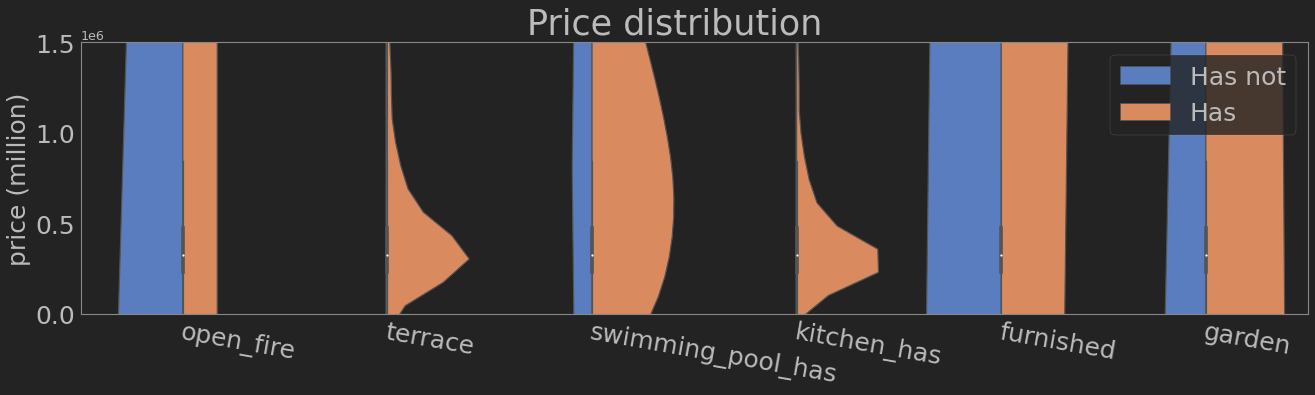

In [556]:
house_mask = df_boolean_melted_typed.house_is == 'Has'
house_flanders_mask = house_mask & (df_boolean_melted_typed.region == 'Flanders')

fig, ax = plt.subplots(figsize=(22,5))

ax = sns.violinplot(x="variable", y="price", hue="value",
                    data=df_boolean_melted_typed[house_flanders_mask], palette="muted",
                   inner = 'box', scale = 'area', hue_order = ['Has not', 'Has'], split = True)

ax.set_ylabel('price (million)', fontsize = 25)
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize = 25)
ax.axis([None, None, 0, 1500000])
ax.legend(loc = 'upper right', fontsize = 25)
ax.grid(False)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=-10, ha="left", rotation_mode="anchor")

fig.suptitle('Price distribution', fontsize=35)

plt.savefig('../pictures/boolean_cor_house_flanders.png', transparent=True)
plt.show()